<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/Moon_Shape_Dataset_dicision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 

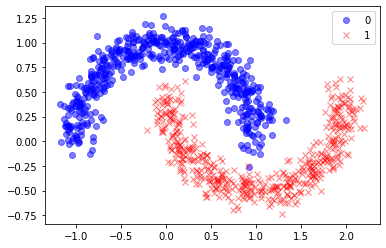

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1,random_state=0)
plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [3]:
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train

array([[ 1.76205245, -0.14570237],
       [ 0.55588423, -0.48846328],
       [-0.78700509,  0.29237568],
       ...,
       [ 0.87494615,  0.47891825],
       [ 0.02224454,  1.03198998],
       [ 0.66971953,  0.40652933]])

In [8]:
len(X_train)

700

In [9]:
len(X_test)

300

In [10]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [11]:
X_train[0]

array([ 1.76205245, -0.14570237])

In [12]:
import tensorflow as tf

Using single layer Neural Network

In [14]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, input_dim= 2, activation='sigmoid')
])
model.compile(tf.keras.optimizers.Adam(lr=0.05),'binary_crossentropy', metrics =['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=200,verbose=0)

In [16]:
result = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8467


In [17]:
result

[0.31900539994239807, 0.846666693687439]

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


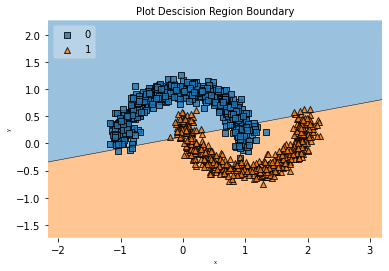

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X,y=y,clf=model,legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Descision Region Boundary', size=10)
plt.show()

Using 3 layer Neural Network

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [23]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000


[0.002235713880509138, 1.0]

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


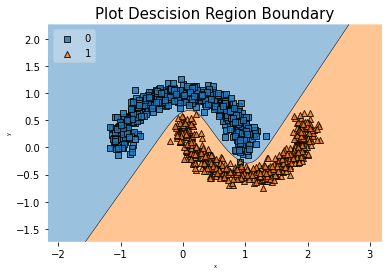

In [30]:
plot_decision_regions(X=X,y=y,clf=model,legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Descision Region Boundary', size=15)
plt.show()